In [1]:
import numpy as np
import pandas as pd
from data import get_data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error 

## Linear Regression with Microsoft (highest allocation)

In [2]:
msft = get_data('msft', period="1y")
ndq = get_data('nq=f', period="1y")

The size of  msft is  (252, 7)
The size of  nq=f is  (253, 7)


In [3]:
extra_rows = ndq.index.difference(msft.index)

In [4]:
ndq = ndq.drop(extra_rows)

In [5]:
# Split the data into X (predictor) and y (target)
X = np.array(msft.returns).reshape(-1, 1)
y = np.array(ndq.returns)

In [6]:
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3) 

In [7]:
# Initialize and fit the linear regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

Ridge()

In [8]:
# making predictions 
predictions_linear = model_linear.predict(X_test) 
predictions_ridge = model_ridge.predict(X_test)

In [9]:
# model evaluation for OLS
print('MSE for OLS : ', mean_squared_error(y_test, predictions_linear)) 
print('MAE for OLS : ', mean_absolute_error(y_test, predictions_linear)) 
# model evaluation for ridge
print('MSE for Ridge : ', mean_squared_error(y_test, predictions_ridge)) 
print('MAE for Ridge : ', mean_absolute_error(y_test, predictions_ridge))

MSE for OLS :  6.289182990012848e-05
MAE for OLS :  0.005592299313165998
MSE for Ridge :  0.00011022315845312118
MAE for Ridge :  0.007967882041650737


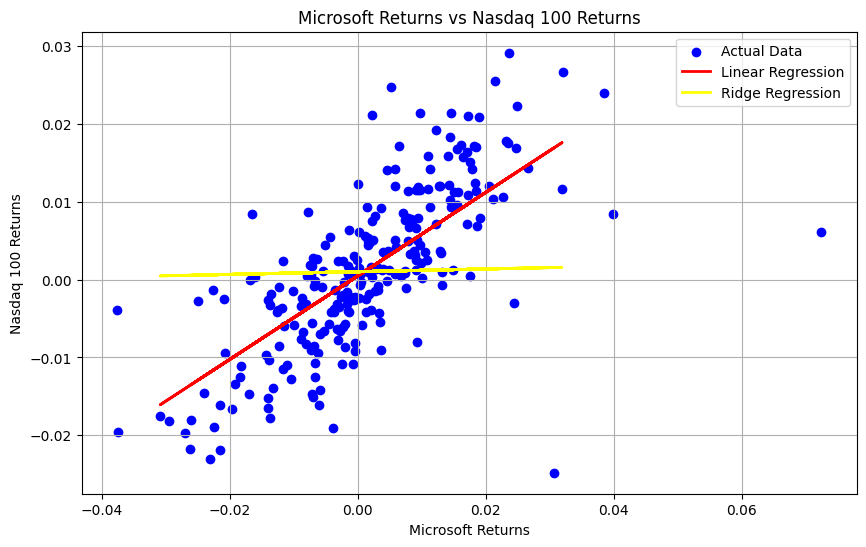

In [10]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_test, predictions_linear, color='red', linewidth=2, label='Linear Regression')
plt.plot(X_test, predictions_ridge, color='yellow', linewidth=2, label='Ridge Regression')
plt.title('Microsoft Returns vs Nasdaq 100 Returns')
plt.xlabel('Microsoft Returns')
plt.ylabel('Nasdaq 100 Returns')
plt.legend()
plt.grid(True)
plt.show()

## Multiple Linear Regression with Top 5 Highest Allocations

In [11]:
aapl = get_data('aapl', period="1y")
nvda = get_data('nvda', period="1y")
amzn = get_data('amzn', period="1y")

The size of  aapl is  (252, 7)
The size of  nvda is  (252, 7)
The size of  amzn is  (252, 7)


In [12]:
X = pd.concat([msft.returns, aapl.returns, nvda.returns, amzn.returns], axis=1)

In [13]:
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [14]:
# creating a regression model 
model = LinearRegression() 

In [15]:
# fitting the model 
model.fit(X_train,y_train)

LinearRegression()

In [16]:
# making predictions 
predictions = model.predict(X_test) 

In [17]:
# model evaluation 
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

mean_squared_error :  3.306400266531838e-05
mean_absolute_error :  0.004283400595234925


## Multiple Ridge Regression

In [18]:
ridge_model = Ridge()

In [19]:
ridge_model.fit(X_train, y_train)

Ridge()

In [20]:
ridge_predictions = ridge_model.predict(X_test)

In [21]:
# model evaluation 
print( 
  'mean_squared_error : ', mean_squared_error(y_test, ridge_predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, ridge_predictions)) 

mean_squared_error :  9.441841556914233e-05
mean_absolute_error :  0.007321669907213106
